# Cross  Validating different ML models in Natural Language Processing

In [111]:
#importing Pandas for Data manipulation
import pandas as pd

In [ ]:
# Reading training data from csv file and storing in a variable
df = pd.read_csv("train_set.csv", encoding='latin-1')

In [113]:
#printing the 1st five rows
df.head()

,label,text
0,85389000,pdscpm gb part of panel of chiller
1,85389000,nm p economical extended rot hand parts for c...
2,85389000,lv ma pd trip unit for cvs parts of circuit br...
3,85389000,lv na p trip unit for cvs switch parts of circ...
4,85389000,lv tmd pd trip unit for cvs parts of circuitbr...


In [114]:
import re
import string
from nltk.corpus import stopwords                                                   
remove = re.compile ('[%s]'%re.escape(string. punctuation))

stop_word = set(stopwords.words('english'))
def clean_text(text):
    
    text = text.lower()                        #defining lowercase
    text = remove.sub(u'', text)            #removing punctuations
    text = ' '.join(word for word in text.split() if word not in stop_word) # removing stopwords
    return text

In [ ]:
df['text'] = df['text'].apply(clean_text)    # applying text_cleaning to our training_set file

# Step2: Split the Train_set.csv data into train and test sets

In [ ]:
from sklearn.model_selection import train_test_split

X= df.text
y= df.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state =0) 

# Step3: Tokenizing the document and counting the unique frequency

In [115]:
# preparing the data for training
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#applying coutvectorizer to tokanize the document
count_vect = CountVectorizer()
X_train_count = count_vect.fit_transform(X_train)

#counting the unique frequency of occurance
tfid_vect = TfidfTransformer()
X_train_tfidf = tfid_vect.fit_transform(X_train_count)

# Step4: Importing ML models for training

In [116]:
from sklearn.naive_bayes import MultinomialNB
from  sklearn. linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#sorting different models in a list
models = [ 
    ('NB', MultinomialNB),
    ('SVM',SGDClassifier(loss = 'hinge', penalty = 'l2', alpha = 1e-3, random_state =0, max_iter =5, tol= None) ),
    ('LR', LogisticRegression(n_jobs =1, C= 1e5)),
    ('DT',DecisionTreeClassifier()),
    ('KNN', KNeighborsClassifier()),
    ('RF', RandomForestClassifier(n_estimators =200, max_depth = 3, random_state =2))]




# Step5: Analyzing different Models Accuracy that best fit the data

In [121]:
from sklearn import model_selection

results = []
names = []
print("Accuracy of different classifiers during Cross Validation")

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=0)
    cv_results = model_selection.cross_val_score(model, X_train_tfidf, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f" % (name, cv_results.mean())
    print(msg)

Accuracy of different classifiers during Cross Validation
NB: 0.885299
SVM: 0.860375
LR: 0.927707
DT: 0.907683
kNN: 0.882819
RF: 0.483303


Since, Logistic Regression has highest Accuracy. LR will provide the highest predicted output to our test_set.csv file. 

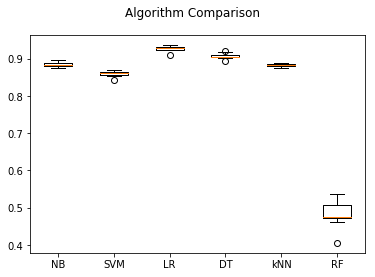

In [122]:
#Compare Algorithms
from matplotlib import pyplot as plt

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Seeing the result in a plot. 